**Music Genre Classification with CNN**

**Data Cleaning for CSV files**

In [ ]:
import pandas as pd

# Load the feature files
df_30_sec = pd.read_csv('Dataset/features_30_sec.csv')
df_3_sec = pd.read_csv('Dataset/features_3_sec.csv')
missing_30_sec = df_30_sec.isnull().sum()
missing_3_sec = df_3_sec.isnull().sum()




Missing values

In [ ]:
# Check for missing values
print(df_30_sec.isnull().sum())
print("Missing values in features_30_sec.csv:")
print(missing_30_sec[missing_30_sec > 0])

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
print(df_3_sec.isnull().sum())
print("\nMissing values in featuers_3_sec.csv:")
print(missing_3_sec[missing_3_sec > 0])

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
import os

image_folder = 'Dataset/images_original'
all_images = os.listdir(image_folder)
# Check if any files are missing or cannot be loaded
missing_images = [img for img in all_images if not os.path.exists(os.path.join(image_folder, img))]
print("Missing images:", missing_images)


Missing images: []


Outlier detection

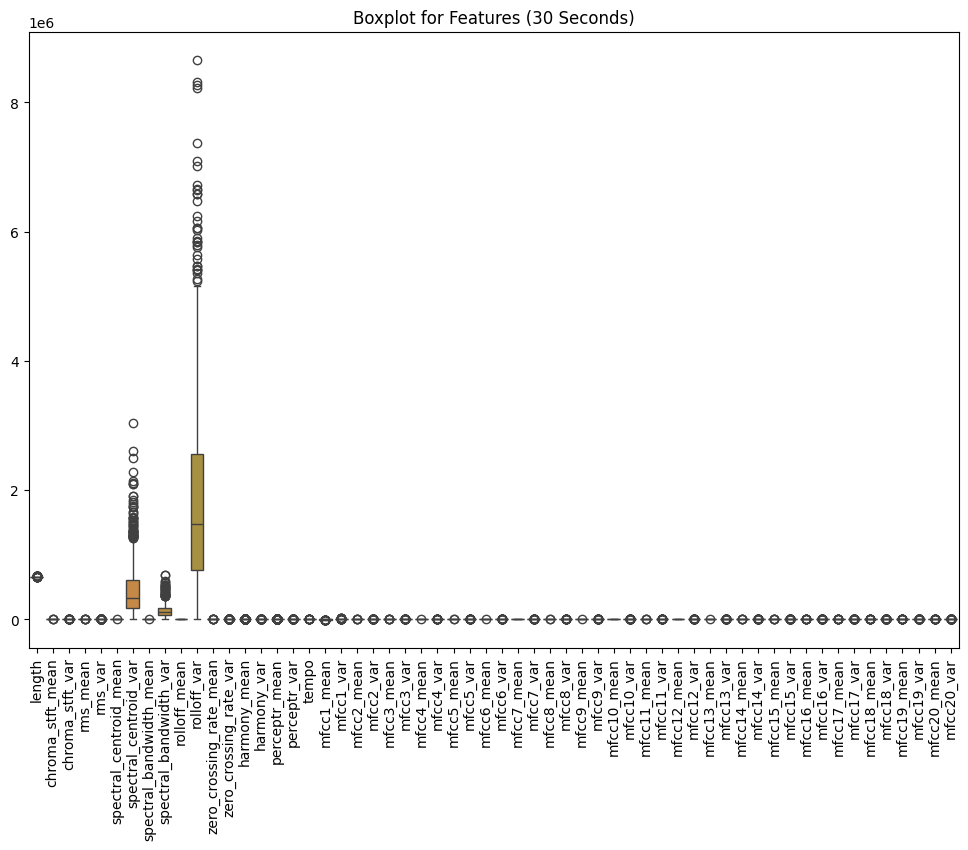

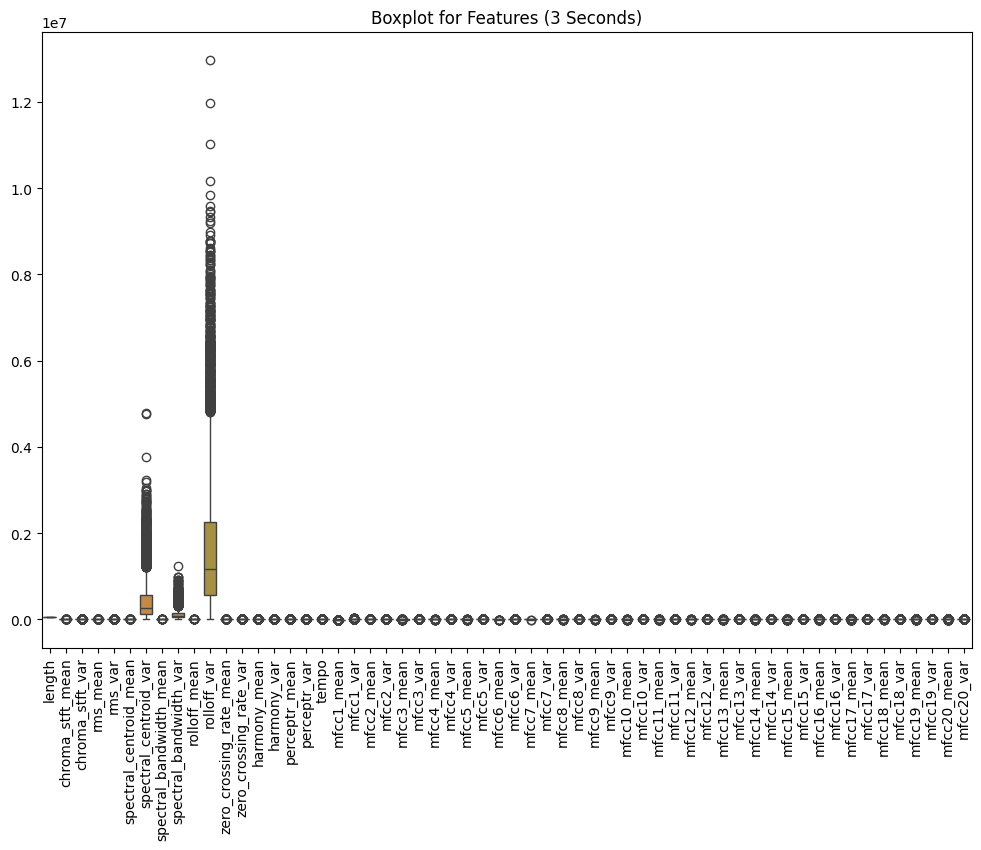

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For the 30-second features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_30_sec)
plt.title('Boxplot for Features (30 Seconds)')
plt.xticks(rotation=90)
plt.show()

# For the 3-second features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_3_sec)
plt.title('Boxplot for Features (3 Seconds)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Check the data types of all columns
print(df_30_sec.dtypes)
print(df_3_sec.dtypes)


filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
# import numpy as np
# # Select only the numeric columns
# numeric_columns_30_sec =df_30_sec.select_dtypes(include=[np.number]).columns
# numeric_columns_3_sec = df_3_sec.select_dtypes(include=[np.number]).columns

# # Now apply your transformations only to numeric columns
# df_30_sec_numeric = df_30_sec[numeric_columns_30_sec]
# df_3_sec_numeric = df_3_sec[numeric_columns_3_sec]


Removing outliers by advanced techniques

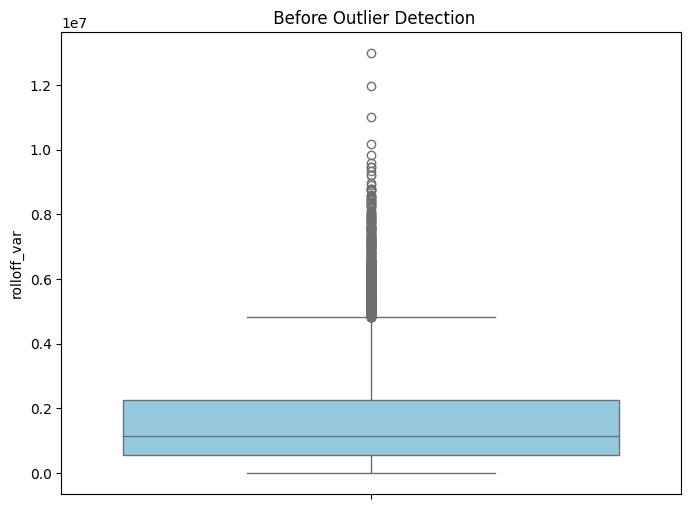

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_3_sec['rolloff_var'], color='skyblue')
plt.title(" Before Outlier Detection")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

# Assuming df_30_sec and df_3_sec are your dataframes with numeric features

# Calculate Z-scores for the 30-second features (only for numeric columns)
z_scores_30_sec = df_30_sec.select_dtypes(include=[np.number]).apply(zscore)

# Calculate Z-scores for the 3-second features (only for numeric columns)
z_scores_3_sec = df_3_sec.select_dtypes(include=[np.number]).apply(zscore)

# Define a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Remove outliers for the 30-second features based on Z-scores
mask_30_sec = (abs(z_scores_30_sec) <= threshold)  # Only keep rows where Z-scores are <= 3
features_30_sec_clean = df_30_sec[mask_30_sec.all(axis=1)]  # Filter rows where all features are within the threshold



# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # 5% of data is expected to be outliers

# Fit the model and predict outliers
outliers_3_sec = iso_forest.fit_predict(df_3_sec.select_dtypes(include=[np.number]))

# Convert -1 (outlier) to boolean True, 1 (inlier) to boolean False
mask_3_sec_iso = outliers_3_sec == 1

# Filter the data based on the outlier prediction
features_3_sec_clean = df_3_sec[mask_3_sec_iso]

print(f"Outliers removed using Isolation Forest (3-seconds). Shape: {features_3_sec_clean.shape}")

# Show the results
print(f"Original 30-second features shape: {df_30_sec.shape}")
print(f"After removing outliers 30-second features shape: {features_30_sec_clean.shape}")
print(f"Original 3-second features shape: {df_3_sec.shape}")
print(f"After removing outliers 3-second features shape: {features_3_sec_clean.shape}")



Outliers removed using Isolation Forest (3-seconds). Shape: (9490, 60)
Original 30-second features shape: (1000, 60)
After removing outliers 30-second features shape: (719, 60)
Original 3-second features shape: (9990, 60)
After removing outliers 3-second features shape: (9490, 60)


Drop duplicates if we have any

In [ ]:
df_30_sec=features_30_sec_clean
df_3_sec=features_3_sec_clean
df_3_sec.drop_duplicates(inplace=True)
df_30_sec.drop_duplicates(inplace=True)


In [ ]:
df_30_sec.columns


Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [ ]:
df_3_sec.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

**Data Exploration for CSV files**


**Statistical methods to understand about data**

In [ ]:
# Get statistical summaries of numerical columns
print(df_30_sec.describe())


              length  chroma_stft_mean  chroma_stft_var    rms_mean  \
count     719.000000        719.000000       719.000000  719.000000   
mean   661764.867872          0.382124         0.085667    0.129284   
std       492.293641          0.072355         0.006780    0.058578   
min    660000.000000          0.187064         0.063166    0.009495   
25%    661504.000000          0.330065         0.081828    0.090576   
50%    661794.000000          0.384296         0.086081    0.120091   
75%    661794.000000          0.433772         0.090145    0.170107   
max    666820.000000          0.583706         0.103829    0.293576   

          rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  719.000000              719.000000           7.190000e+02   
mean     0.002431             2191.371487           3.981290e+05   
std      0.002229              666.548375           2.905367e+05   
min      0.000004              570.040355           2.142404e+04   
25%      0.000978   

In [ ]:
# Get statistical summaries of numerical columns
print(df_3_sec.describe())


        length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9490.0       9490.000000      9490.000000  9490.000000  9.490000e+03   
mean   66149.0          0.381399         0.084585     0.130038  2.458977e-03   
std        0.0          0.087739         0.009361     0.066206  3.071799e-03   
min    66149.0          0.116085         0.040595     0.001539  1.257168e-07   
25%    66149.0          0.320092         0.079622     0.084558  6.142311e-04   
50%    66149.0          0.385898         0.084855     0.120941  1.468533e-03   
75%    66149.0          0.442593         0.090714     0.174600  2.970914e-03   
max    66149.0          0.667934         0.120964     0.378848  3.178489e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9490.000000           9.490000e+03              9490.000000   
mean              2179.538819           3.881647e+05              2232.826731   
std                724.453074       

**Visualization**

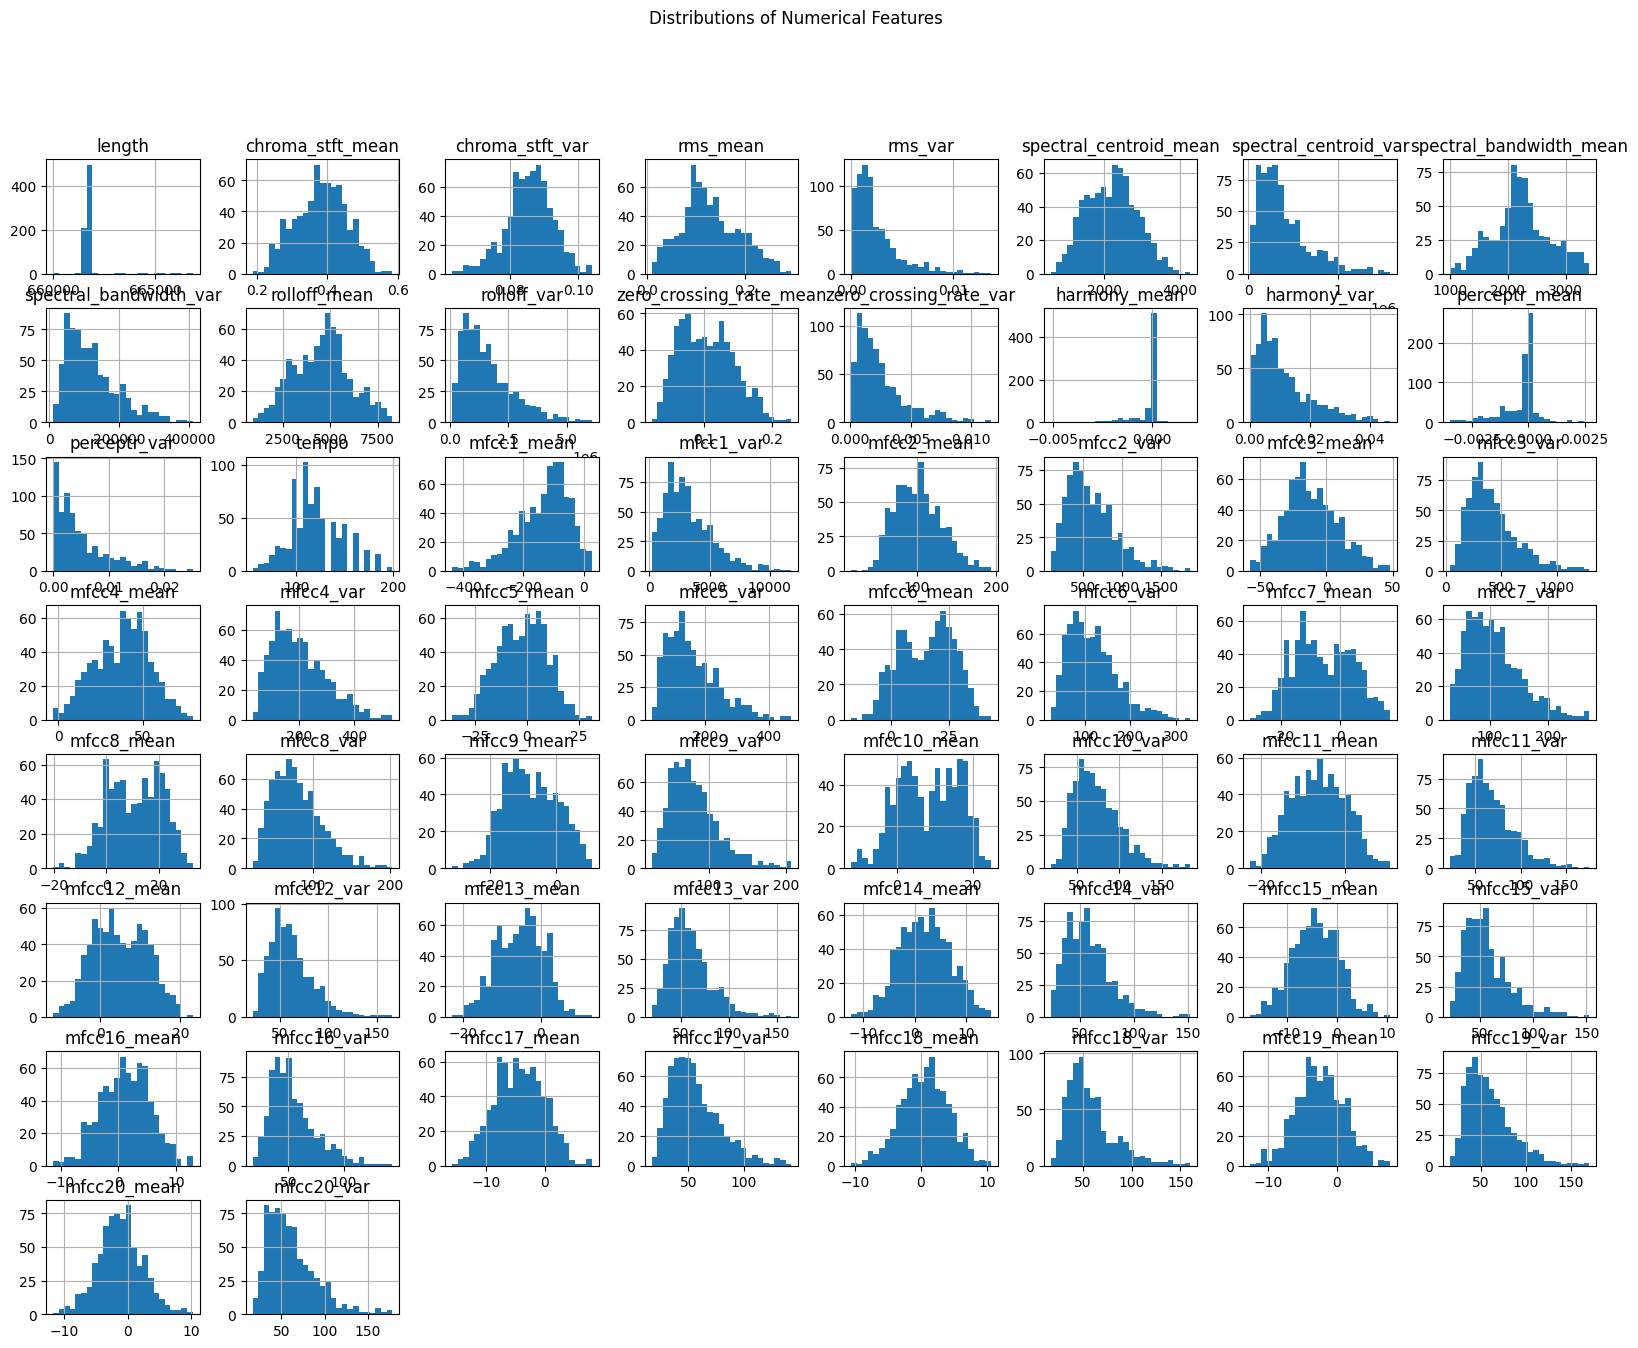

In [ ]:
# Plot histograms for all numerical columns
df_30_sec.select_dtypes(include=[np.number]).hist(bins=25, figsize=(20, 15))
plt.suptitle("Distributions of Numerical Features")
plt.show()


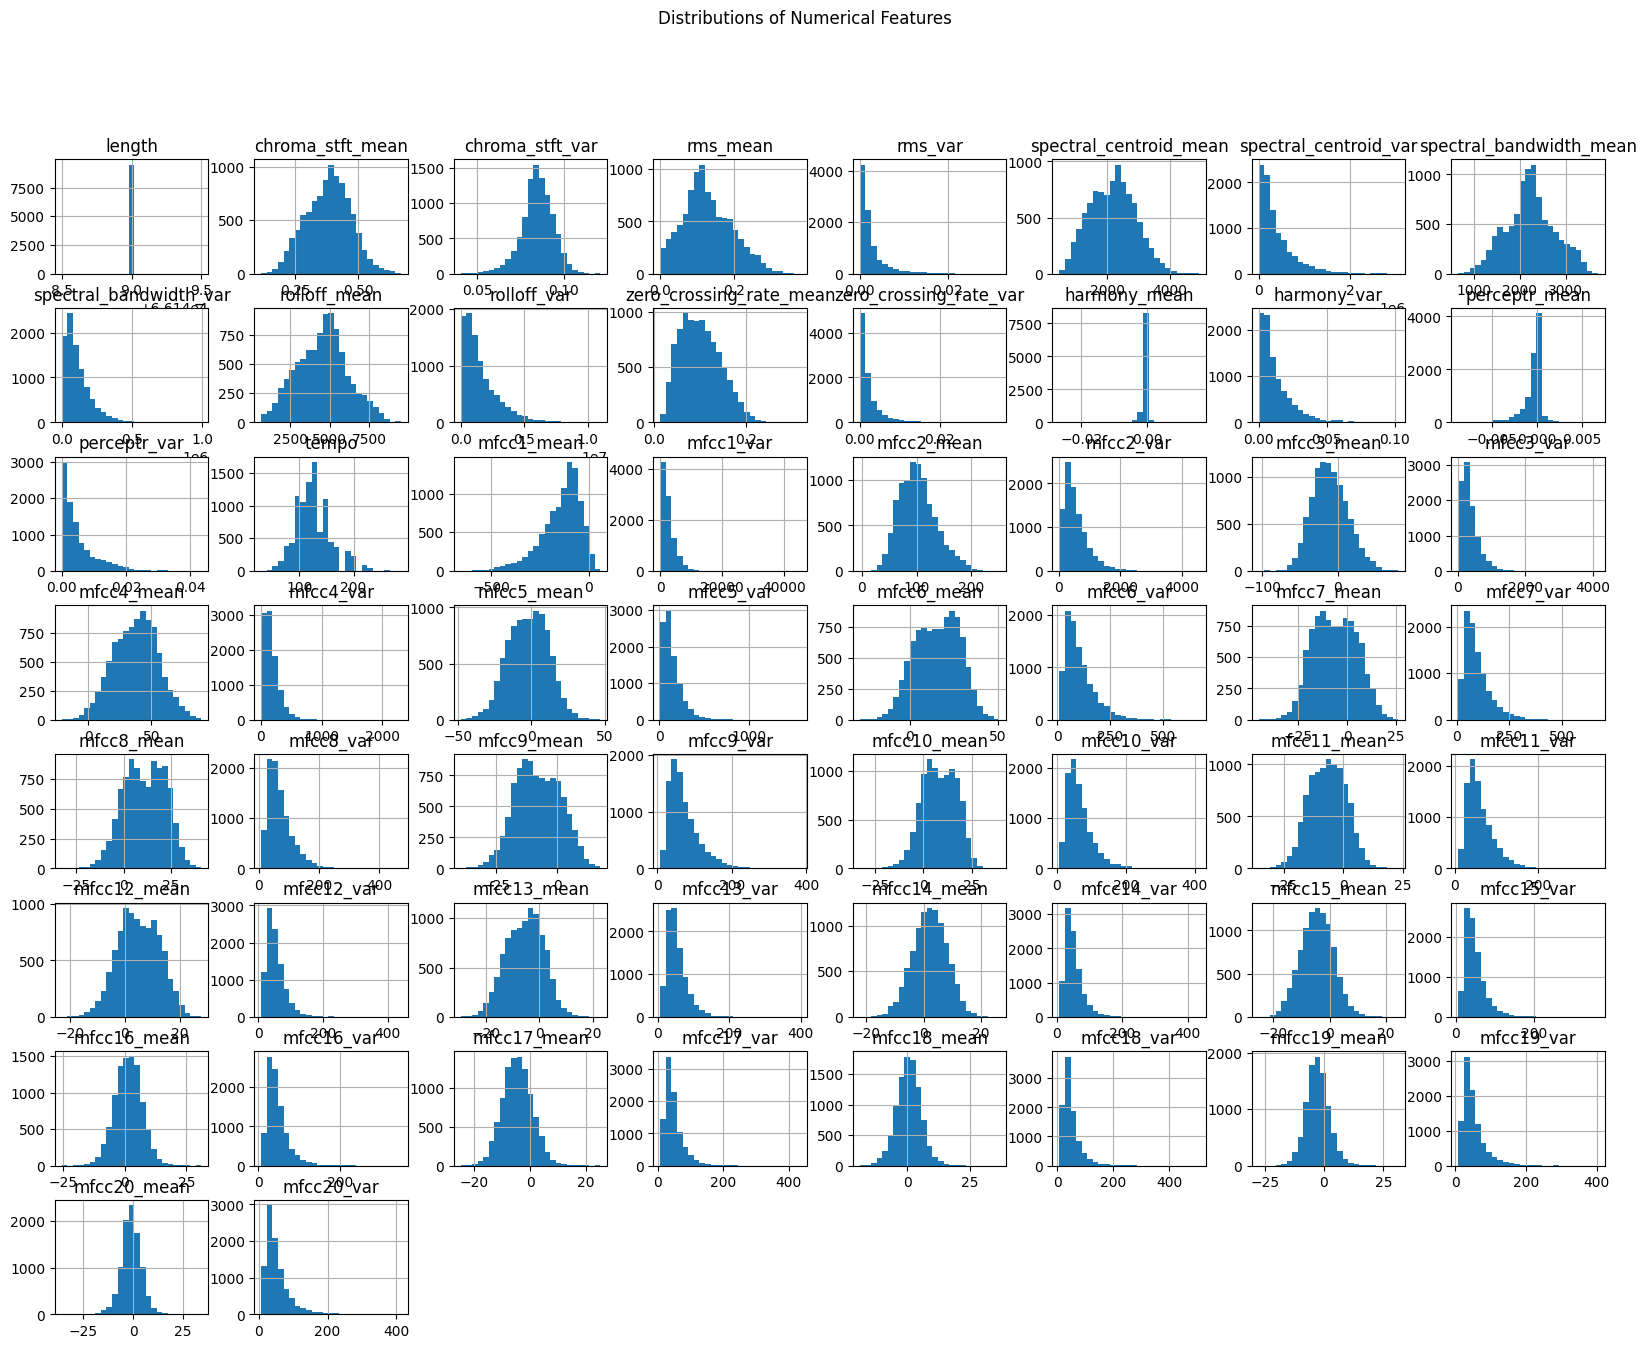

In [ ]:
# Plot histograms for all numerical columns
df_3_sec.select_dtypes(include=[np.number]).hist(bins=25, figsize=(20, 15))
plt.suptitle("Distributions of Numerical Features")
plt.show()


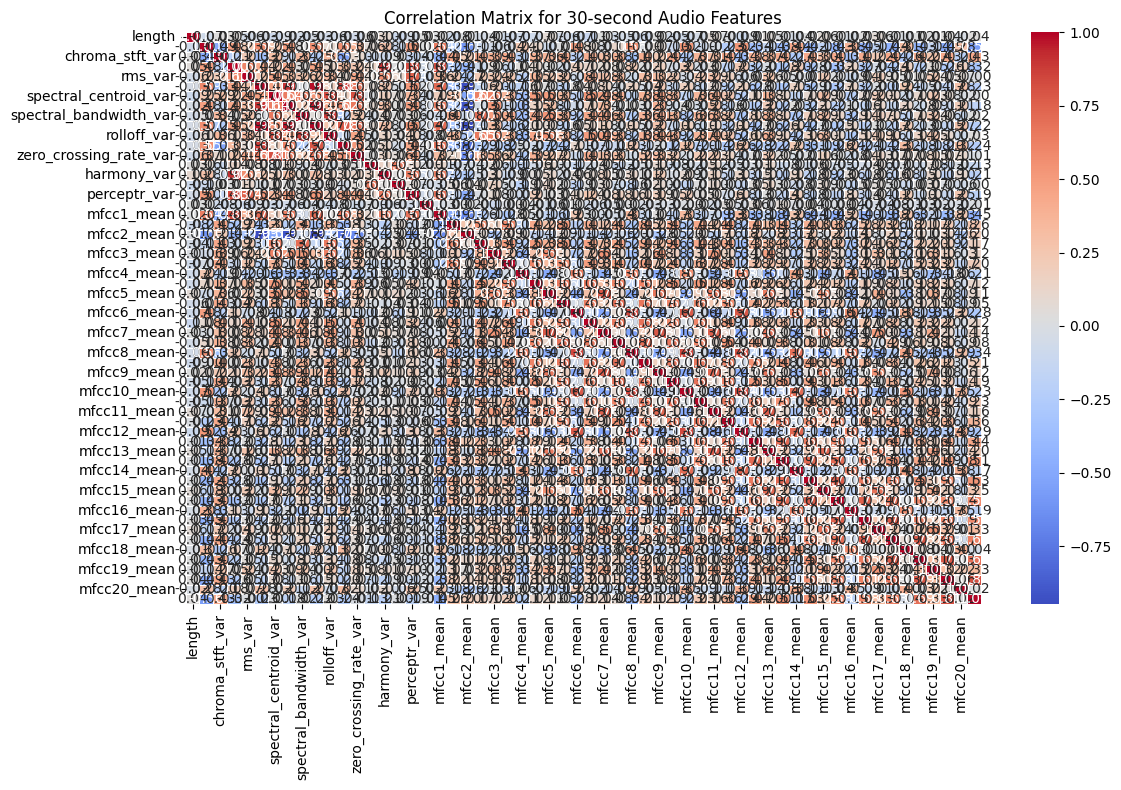

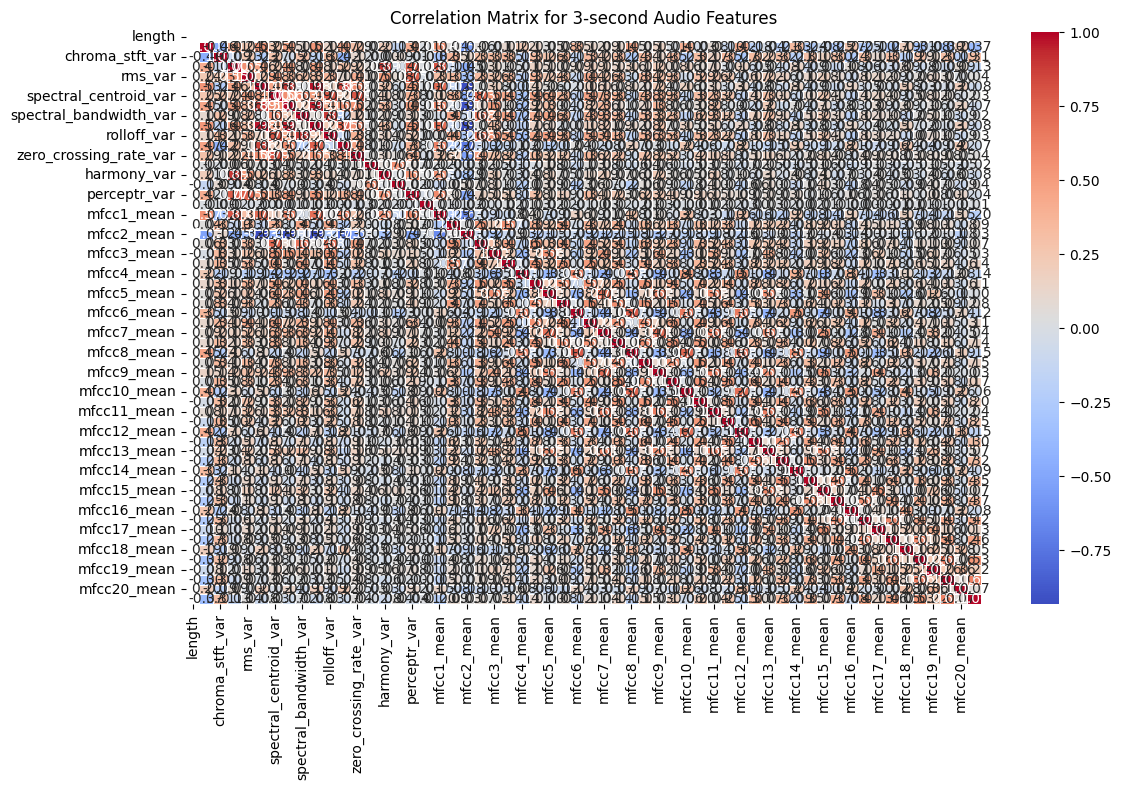


Selected Features after Removing Highly Correlated Features (30 sec):
Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_var', 'rolloff_var', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'harmony_mean', 'perceptr_mean',
       'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_var',
       'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean',
       'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var',
       'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean',
       'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
       'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean',
       'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var',
       'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean',
       'mfcc20_var', 'la

In [ ]:


# Assuming the dataframes are already loaded
# Select numeric columns (remove non-numeric columns)
numeric_features_30_sec = df_30_sec.select_dtypes(include=[float, int])
numeric_features_3_sec = df_3_sec.select_dtypes(include=[float, int])

# 1. Calculate the correlation matrix
correlation_matrix_30_sec = numeric_features_30_sec.corr()
correlation_matrix_3_sec = numeric_features_3_sec.corr()

# 2. Plot the correlation matrix for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_30_sec, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for 30-second Audio Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_3_sec, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for 3-second Audio Features')
plt.tight_layout()
plt.show()

# 3. Set a correlation threshold (e.g., 0.9) to identify highly correlated features
correlation_threshold = 0.9

# For 30-second audio features
correlated_features_30_sec = set()
for i in range(len(correlation_matrix_30_sec.columns)):
    for j in range(i):
        if abs(correlation_matrix_30_sec.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix_30_sec.columns[i]
            correlated_features_30_sec.add(colname)

# For 3-second audio features
correlated_features_3_sec = set()
for i in range(len(correlation_matrix_3_sec.columns)):
    for j in range(i):
        if abs(correlation_matrix_3_sec.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix_3_sec.columns[i]
            correlated_features_3_sec.add(colname)

# 4. Drop highly correlated features from the dataset
df_30_sec = df_30_sec.drop(columns=correlated_features_30_sec)
df_3_sec = df_3_sec.drop(columns=correlated_features_3_sec)

# 5. Show the reduced dataset and the selected features
print("\nSelected Features after Removing Highly Correlated Features (30 sec):")
print(df_30_sec.columns)

print("\nSelected Features after Removing Highly Correlated Features (3 sec):")
print(df_3_sec.columns)



Class distribution for 30-second audio features:
label
rock         90
country      88
disco        85
metal        78
jazz         76
reggae       66
blues        65
pop          62
hiphop       55
classical    54
Name: count, dtype: int64


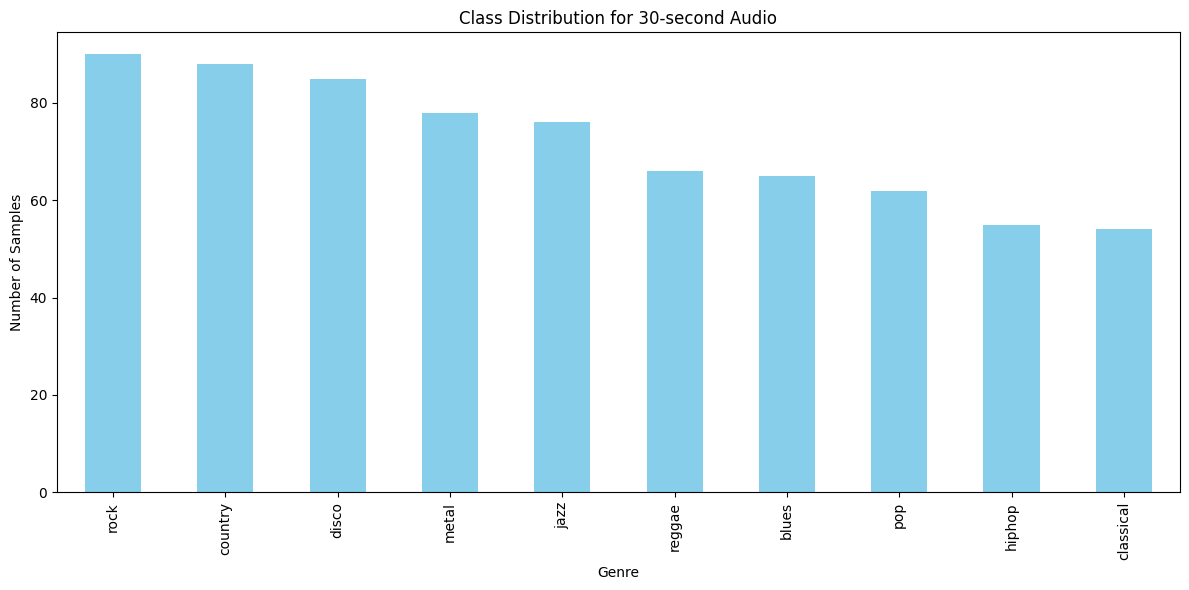

In [ ]:
if 'label' in df_30_sec.columns:
    genre_counts_30_sec = df_30_sec['label'].value_counts()
    print("\nClass distribution for 30-second audio features:")
    print(genre_counts_30_sec)
    genre_counts_30_sec.plot(kind='bar', figsize=(12, 6), color='skyblue')
    plt.title('Class Distribution for 30-second Audio')
    plt.xlabel('Genre')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    plt.show()


Class distribution for 3-second audio features:
label
metal        994
country      989
disco        989
rock         987
blues        963
jazz         953
reggae       953
hiphop       921
classical    900
pop          841
Name: count, dtype: int64


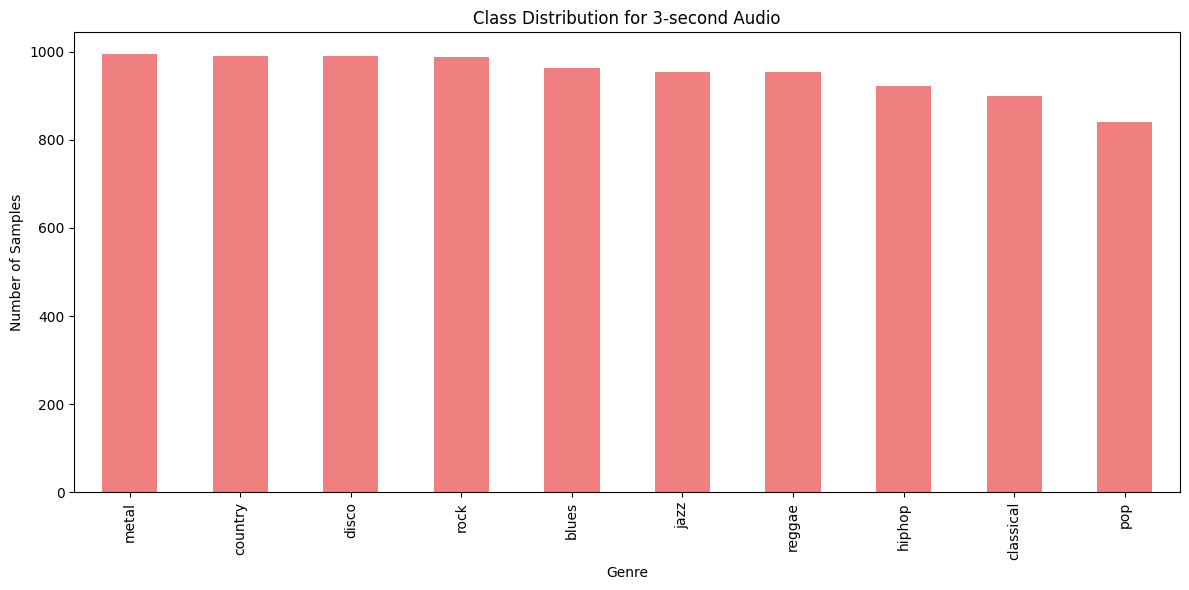

In [ ]:
if 'label' in df_3_sec.columns:
    genre_counts_3_sec = df_3_sec['label'].value_counts()
    print("\nClass distribution for 3-second audio features:")
    print(genre_counts_3_sec)

    # Plot the distribution
    genre_counts_3_sec.plot(kind='bar', figsize=(12, 6), color='lightcoral')
    plt.title('Class Distribution for 3-second Audio')
    plt.xlabel('Genre')
    plt.ylabel('Number of Samples')
    plt.tight_layout()
    plt.show()

In [ ]:
df_30_sec.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_var   rolloff_var  ...  mfcc16_var  mfcc17_mean  \
0            85882.761315  9.015054e+05  ...   52.420910    -1.690215   
1           213843.755497  2.977893e+06  ...   55.356403    -0.731125   
2            76254.192257  7.840345e+05  ...   40.598766    -7.729093   
3           166441.494769  1.493194e+06  ...   44.427753    -3.319597   
4            88445.209036  1.572978e+06  ...   86.099236    -5.454034   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.524071    -0.408979   41.597103    -2.303523   55.062923     1.221291   
1   60.314529     0.295073   48.120598    -0.283518   51.106190     0.531217   
2   47.639427    -1.816407   52.382141    -3.439720   46.639660    -2.231258   
3   50.206673     0.636965   37.319130    -0.619121   37.259739    -3.407448   
4   75.269707    -0.916874   53.613918    -4.404827   62.910812   -11.703234   

   mfcc20_var  label  
0   46.936035  blues  
1   45.786282  blues  
2   30.573025  blues  
3   31.949339  blues  
4   55.195160  blues  

[5 rows x 56 columns]

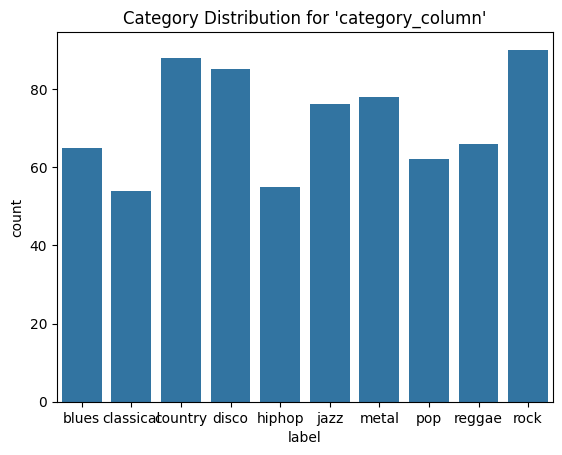

In [ ]:
# Bar plot for a categorical column
sns.countplot(data=df_30_sec, x='label')
plt.title("Category Distribution for 'category_column'")
plt.show()


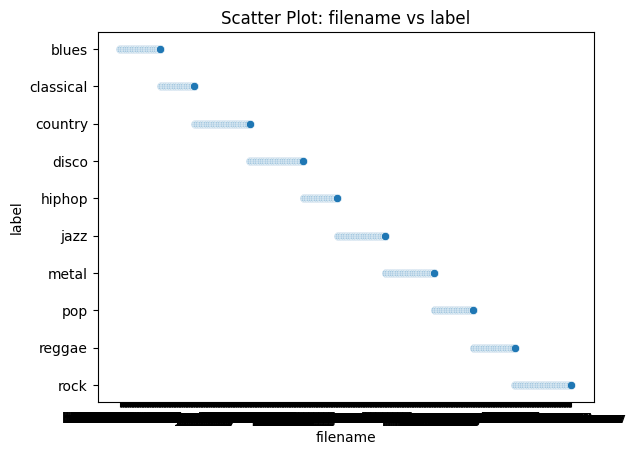

In [ ]:
# Scatter plot of two features (e.g., 'Column_1' vs. 'Column_2')
sns.scatterplot(data=df_30_sec, x='filename', y='label')
plt.title("Scatter Plot: filename vs label")
plt.show()


In [ ]:
import os

# Define the paths to the directories
audio_dir = 'C://Users/jesel sequeira/Downloads/archive (4)/Data/genres_original'
image_dir = 'C://Users/jesel sequeira/Downloads/archive (4)/Data/images_original'

# List the files in both directories
audio_files = os.listdir(audio_dir)
image_files = os.listdir(image_dir)

# Check a few files in both folders
print(f"Audio Files: {audio_files[:5]}")
print(f"Image Files: {image_files[:5]}")


Audio Files: ['blues', 'classical', 'country', 'disco', 'hiphop']
Image Files: ['blues', 'classical', 'country', 'disco', 'hiphop']


In [ ]:
# Check for missing audio/image files
unmatched_audio = [audio for audio in audio_files if audio.replace('.wav', '.png') not in image_files]
unmatched_images = [img for img in image_files if img.replace('.png', '.wav') not in audio_files]

print("Unmatched Audio Files:", unmatched_audio)
print("Unmatched Image Files:", unmatched_images)


Unmatched Audio Files: []
Unmatched Image Files: []


**Data Cleaning for Genre folder**

In [ ]:
import os
import librosa
import numpy as np

# Path to your dataset
data_dir = audio_dir

# Duration check (approx. 30 sec at 22050 Hz)
expected_duration = 30  # seconds
expected_sr = 22050     # default sampling rate for librosa

# To log failed files
corrupt_files = []

# For storing processed audio and labels
audio_data = []
labels = []
target_duration = 30  # seconds
tolerance = 1         # allow +/- 1 second
# Walk through the directory
for genre in os.listdir(data_dir):
    genre_path = os.path.join(data_dir, genre)

    if not os.path.isdir(genre_path):
        continue  # Skip if not a folder

    for file in os.listdir(genre_path):
        if not file.endswith('.wav'):
            continue

        file_path = os.path.join(genre_path, file)

        try:
            # Load the audio file
            y, sr = librosa.load(file_path, sr=expected_sr)

            # # Check duration
            # duration = librosa.get_duration(y=y, sr=sr)
            # if abs(duration - expected_duration) > 1:  # allow slight variation
            #     print(f"Skipping {file} (duration {duration:.2f}s)")
            #     continue

            duration = librosa.get_duration(y=y, sr=sr)
            if abs(duration - target_duration) > tolerance:
                print(f"Skipping {file} (duration {duration:.2f}s)")
                continue

            audio_data.append(y)
            labels.append(genre)  # genre from folder name

        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            corrupt_files.append(file_path)

print(f"\nProcessed {len(audio_data)} files successfully.")
print(f"Skipped {len(corrupt_files)} corrupt or invalid files.")


C:\Users\jesel sequeira\AppData\Local\Temp\ipykernel_3060\230676691.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=expected_sr)
C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading C://Users/jesel sequeira/Downloads/archive (4)/Data/genres_original\jazz\jazz.00054.wav: 

Processed 999 files successfully.
Skipped 1 corrupt or invalid files.


Extracted Genre name from folders

In [ ]:
labels

['blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',
 'blues',


**Data Exploration for Genre**

In [ ]:

from collections import defaultdict

expected_sr = 22050

genre_counts = defaultdict(int)
durations = []

# For visual samples
sample_waveforms = {}
sample_spectrograms = {}

for genre in os.listdir(data_dir):
    genre_path = os.path.join(data_dir, genre)
    if not os.path.isdir(genre_path):
        continue

    files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    genre_counts[genre] = len(files)

    for idx, file in enumerate(files):
        file_path = os.path.join(genre_path, file)
        try:
            y, sr = librosa.load(file_path, sr=expected_sr)
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)

            # Save one sample for waveform & spectrogram plotting
            if genre not in sample_waveforms and idx == 0:
                sample_waveforms[genre] = y
                sample_spectrograms[genre] = librosa.feature.melspectrogram(y=y, sr=sr)

        except Exception as e:
            print(f"Error loading {file_path}: {e}")



C:\Users\jesel sequeira\AppData\Local\Temp\ipykernel_3060\676354916.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=expected_sr)
C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading C://Users/jesel sequeira/Downloads/archive (4)/Data/genres_original\jazz\jazz.00054.wav: 


In [ ]:
# 1. Count number of audio files per genre
print("\n Number of audio files per genre:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count} files")


 Number of audio files per genre:
blues: 100 files
classical: 100 files
country: 100 files
disco: 100 files
hiphop: 100 files
jazz: 100 files
metal: 100 files
pop: 100 files
reggae: 100 files
rock: 100 files



 Plotting sample waveforms...


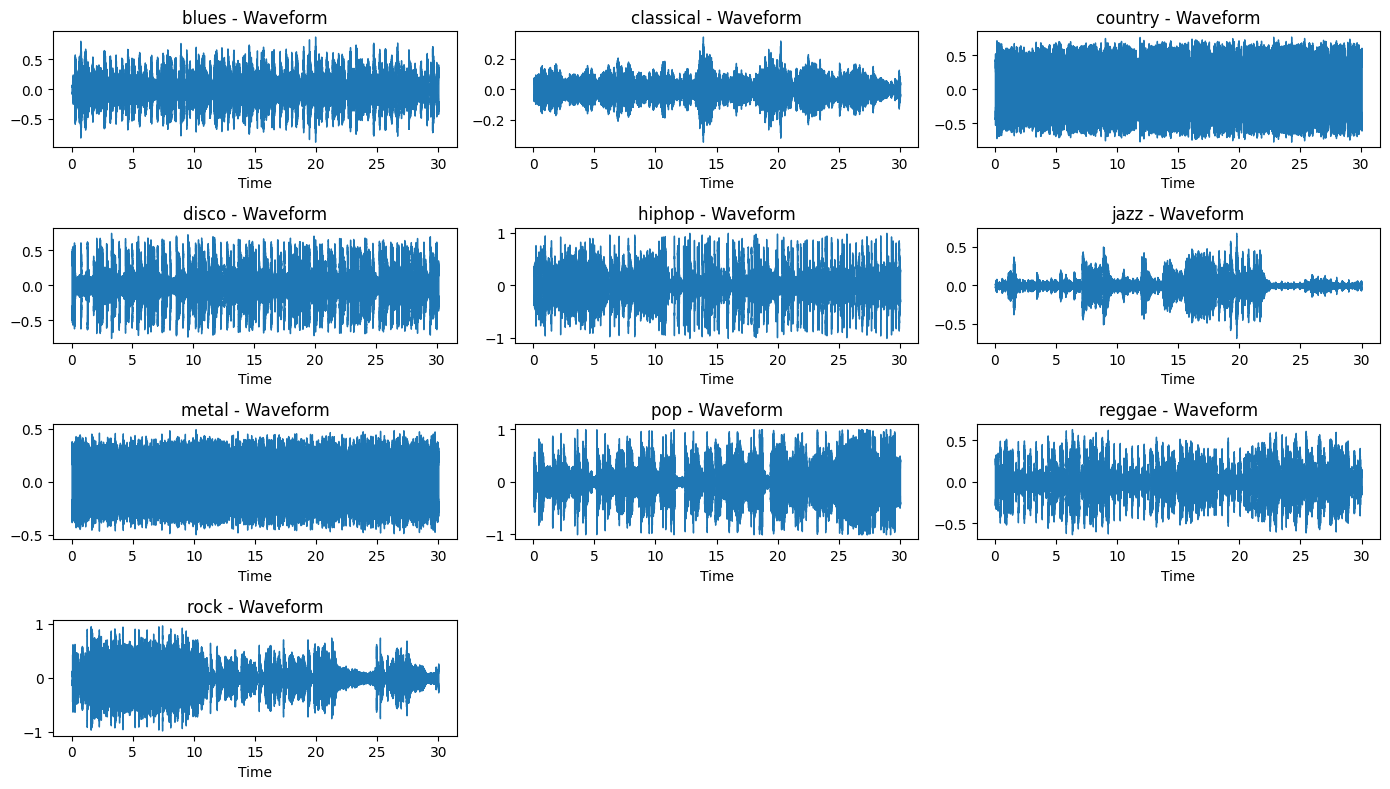

In [ ]:
import matplotlib.pyplot as plt
# 2. Plot sample waveforms
print("\n Plotting sample waveforms...")
plt.figure(figsize=(14, 8))
for i, (genre, y) in enumerate(sample_waveforms.items()):
    plt.subplot(4, 3, i + 1)
    librosa.display.waveshow(y, sr=expected_sr)
    plt.title(f"{genre} - Waveform")
    plt.tight_layout()
plt.show()


 Plotting sample Mel Spectrograms...


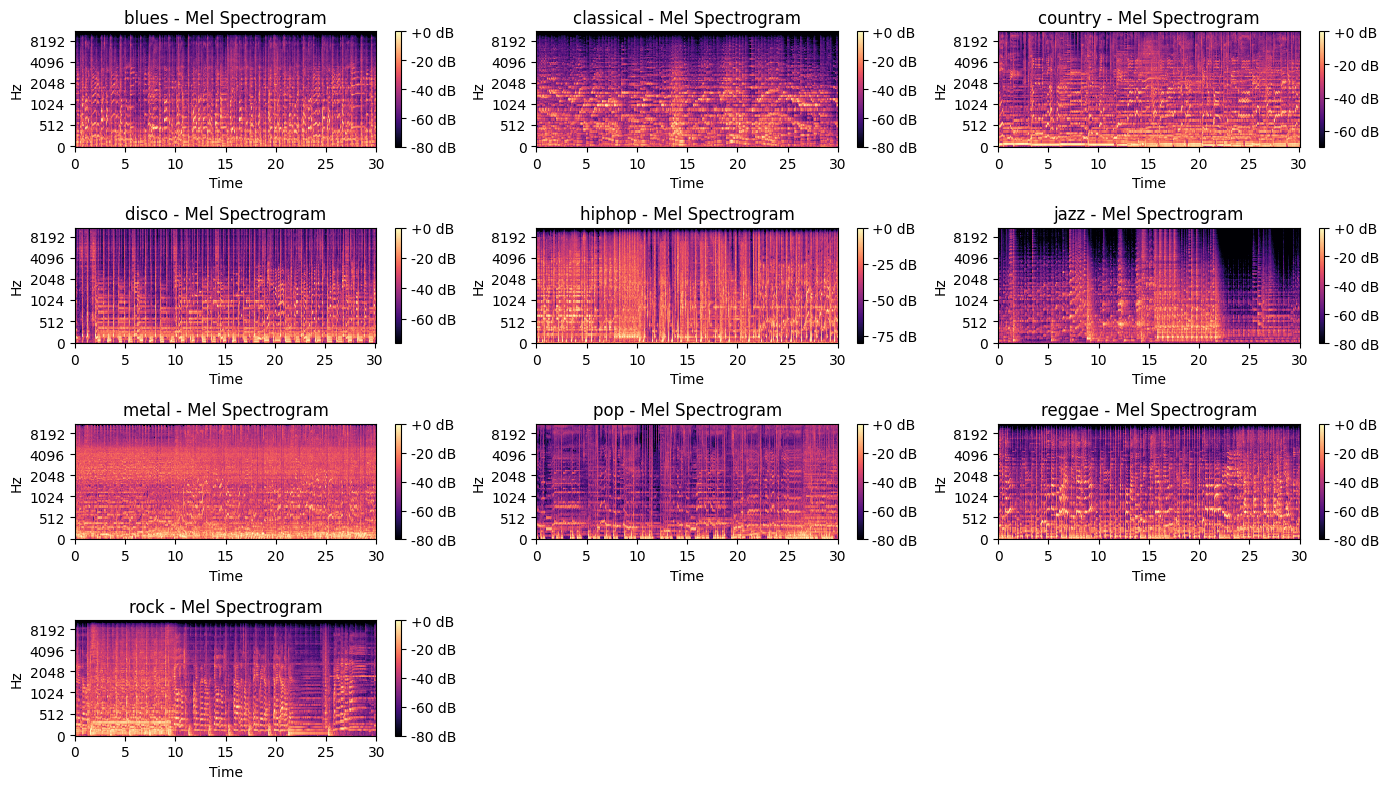

In [ ]:
# 3. Plot sample Mel Spectrograms
print("\n Plotting sample Mel Spectrograms...")
plt.figure(figsize=(14, 8))
for i, (genre, S) in enumerate(sample_spectrograms.items()):
    plt.subplot(4, 3, i + 1)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=expected_sr, x_axis='time', y_axis='mel')
    plt.title(f"{genre} - Mel Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
plt.show()


 Plotting duration distribution...


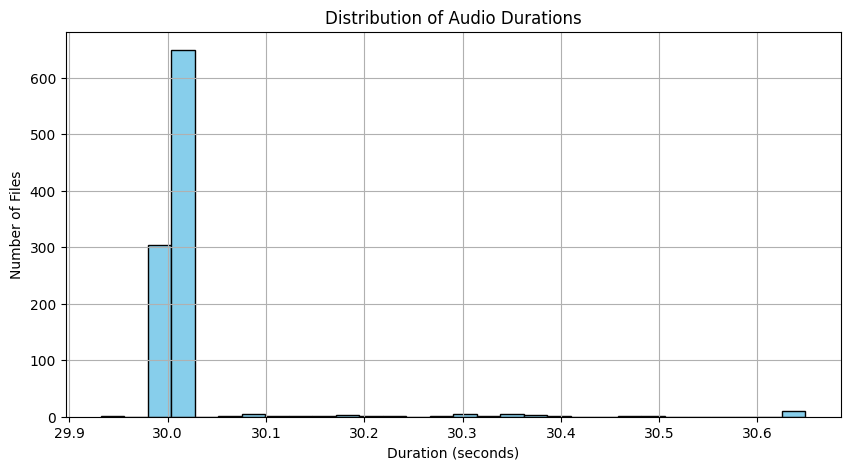

In [ ]:
# 4. Check duration distribution of all audio files
print("\n Plotting duration distribution...")
plt.figure(figsize=(10, 5))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Files")
plt.grid(True)
plt.show()

**Final Feature Engineering Code for Both CSVs**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
# -----------------------------------
# FUNCTION: Process any dataset
# -----------------------------------
def feature_engineering(df):
    df_encoded = df.copy()

    # Step 1: Label Encode the 'label' column
    le = LabelEncoder()
    df_encoded['label_encoded'] = le.fit_transform(df_encoded['label'])

    # Step 2: Extract only numeric columns (excluding label_encoded)
    numeric_df = df_encoded.select_dtypes(include='number').drop(columns=['label_encoded']).copy()

    # Step 3: Create statistical features
    numeric_df['mean_feature'] = numeric_df.mean(axis=1)
    numeric_df['std_feature'] = numeric_df.std(axis=1)
    numeric_df['max_feature'] = numeric_df.max(axis=1)
    numeric_df['min_feature'] = numeric_df.min(axis=1)
    numeric_df['range_feature'] = numeric_df['max_feature'] - numeric_df['min_feature']

    # Step 4: Normalize all numeric features
    scaler = StandardScaler()
    numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

    # Step 5: Combine with non-numeric columns (like filename, label, label_encoded)
    non_numeric_df = df_encoded[['filename', 'label', 'label_encoded']]
    final_df = pd.concat([non_numeric_df.reset_index(drop=True), numeric_scaled.reset_index(drop=True)], axis=1)

    return final_df

# -----------------------------------
# Apply the function to both datasets
# -----------------------------------
final_df_3 = feature_engineering(df_3_sec)
final_df_30 = feature_engineering(df_30_sec)

# -----------------------------------
# View sample outputs
# -----------------------------------
print("3-sec Dataset:")
print(final_df_3.head(), "\n")


3-sec Dataset:
            filename  label  label_encoded  length  chroma_stft_mean  \
0  blues.00000.0.wav  blues              0     0.0         -0.524219   
1  blues.00000.1.wav  blues              0     0.0         -0.436922   
2  blues.00000.2.wav  blues              0     0.0         -0.394186   
3  blues.00000.3.wav  blues              0     0.0         -0.202426   
4  blues.00000.4.wav  blues              0     0.0         -0.522247   

   chroma_stft_var  rms_mean   rms_var  spectral_centroid_mean  \
0         0.690542  0.005539  0.345753               -0.561106   
1         0.166857 -0.261909 -0.328584               -0.500880   
2         0.818167  0.029682  0.703671               -0.539745   
3         0.242671  0.038162 -0.003716               -0.723687   
4         0.378608  0.200150 -0.246803               -0.757691   

   spectral_centroid_var  ...  mfcc18_var  mfcc19_mean  mfcc19_var  \
0              -0.578966  ...   -0.351590    -0.499864   -0.540172   
1              

**Feature Engineering on images_original (for CNN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 1: Constants
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
DATASET_PATH = image_dir

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.
Class-to-Index Mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Image Shape: (128, 128, 3)


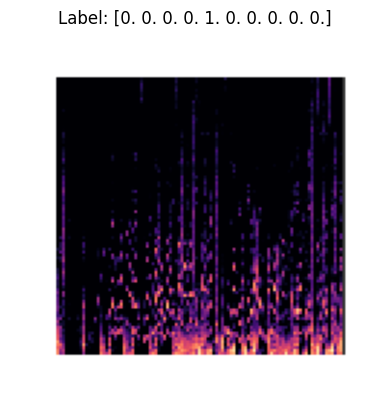

In [ ]:
# ----------------------------------------
# Step 2: Define ImageDataGenerator
# ----------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,           # normalize pixel values
    validation_split=0.2      # 80/20 split
)

# ----------------------------------------
# Step 3: Create the training data generator
# ----------------------------------------
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# ----------------------------------------
# Step 4: Create the validation data generator
# ----------------------------------------
val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ----------------------------------------
# Step 5: Preview class mappings and an image
# ----------------------------------------
print("Class-to-Index Mapping:", train_generator.class_indices)
print("Image Shape:", train_generator.image_shape)

# Show one image
x_batch, y_batch = next(train_generator)
plt.imshow(x_batch[0])
plt.title(f"Label: {y_batch[0]}")
plt.axis('off')
plt.show()

**Feature Engineering on genres_original (audio files)**

In [ ]:
# We are not using Genre files any further as the details that had to be extracted are already in the 2 csv's

**CNN for Music Genre Classification**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),  # Regularization
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 genres
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()


C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)


Epoch 1/20


C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - accuracy: 0.0948 - loss: 2.3072 - val_accuracy: 0.2010 - val_loss: 2.2129
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.1679 - loss: 2.2046 - val_accuracy: 0.2613 - val_loss: 2.0713
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.2832 - loss: 2.0455 - val_accuracy: 0.2513 - val_loss: 1.9726
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.3018 - loss: 1.9244 - val_accuracy: 0.2965 - val_loss: 1.8770
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.3303 - loss: 1.8315 - val_accuracy: 0.3618 - val_loss: 1.8445
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.4140 - loss: 1.7332 - val_accuracy: 0.3367 - val_loss: 1.7600
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 350ms/step - accuracy: 0.4293 - loss: 1.6153 - val_accuracy: 0.3769 - val_loss: 1.7713
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.4510 - loss: 1.5422 - val_accuracy: 0.4070 - va

**Plot Accuracy & Loss Curves**

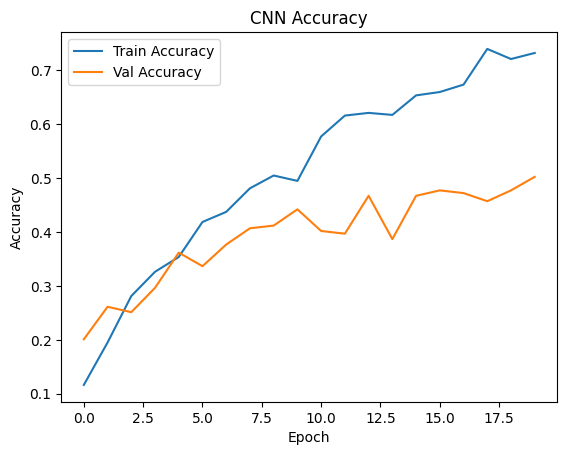

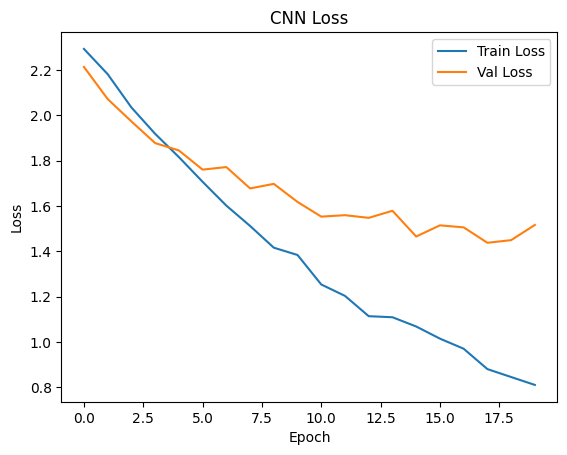

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Check 1:
What’s Going Well:
🔻 Train Loss decreased steadily → from 2.3 to ~0.76

🔺 Train Accuracy increased to ~75%

📈 Model is learning and fitting the training data well

What Needs Attention:
🔸 Validation Loss plateaued at ~1.5 and stopped improving after ~epoch 10

🔸 Validation Accuracy peaked at ~48% (while training reached 75%)

📉 This indicates overfitting — your model is learning training data very well, but not generalizing as strongly to unseen data.

**CNN Tuning Strategy **

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\jesel sequeira\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - accuracy: 0.1199 - loss: 2.2975 - val_accuracy: 0.2261 - val_loss: 2.1913
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 405ms/step - accuracy: 0.1983 - loss: 2.1771 - val_accuracy: 0.3116 - val_loss: 2.0355
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.2919 - loss: 2.0126 - val_accuracy: 0.3568 - val_loss: 1.8920
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.3118 - loss: 1.8430 - val_accuracy: 0.3367 - val_loss: 1.8448
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.4021 - loss: 1.7254 - val_accuracy: 0.3417 - val_loss: 1.7689
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.4488 - loss: 1.6068 - val_accuracy: 0.3920 - val_loss: 1.7386
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.4659 - loss: 1.5428 - val_accuracy: 0.3819 - val_loss: 1.6705
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.5108 - loss: 1.3844 - val_accuracy: 0.417

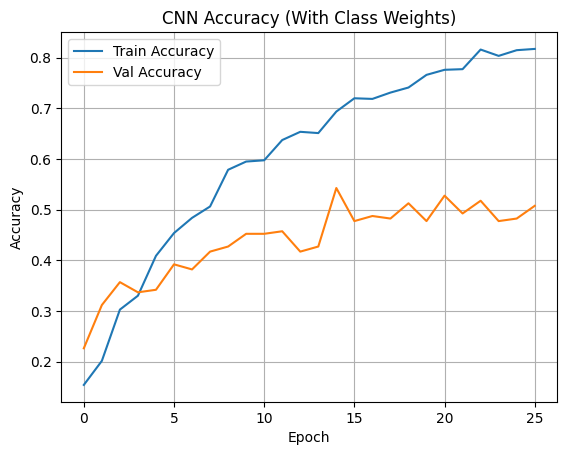

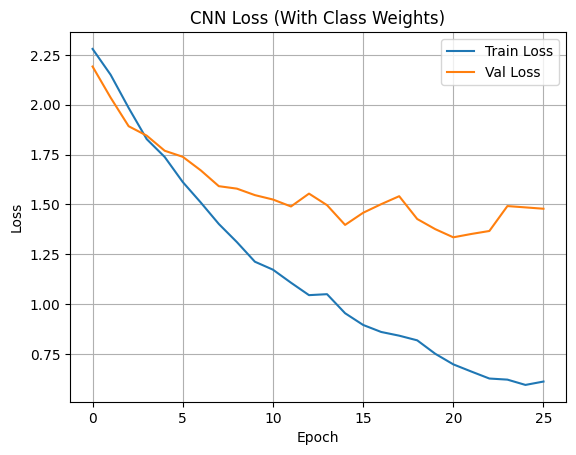

In [ ]:
# CNN with Class Weights
# CNN with class weighting
# Early stopping
# Validation split
# Accuracy/loss visualizations
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Constants
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
EPOCHS = 30

image_dir = 'C://Users/jesel sequeira/Downloads/archive (4)/Data/images_original'
# Load and preprocess data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=10,         # Slight rotation (spectrograms tolerate this)
#     width_shift_range=0.1,     # Horizontal shift
#     height_shift_range=0.1,    # Vertical shift
#     zoom_range=0.1,            # Slight zoom in/out
#     horizontal_flip=True,      # Flip for balance
#     fill_mode='nearest'        # Filling strategy
# )

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Compute class weights
labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 genres
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy (With Class Weights)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss (With Class Weights)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step
Classification Report:

              precision    recall  f1-score   support

       blues       0.31      0.25      0.28        20
   classical       0.63      0.85      0.72        20
     country       0.44      0.40      0.42        20
       disco       0.52      0.65      0.58        20
      hiphop       0.44      0.35      0.39        20
        jazz       0.55      0.63      0.59        19
       metal       0.83      0.95      0.88        20
         pop       0.50      0.55      0.52        20
      reggae       0.50      0.45      0.47        20
        rock       0.33      0.20      0.25        20

    accuracy                           0.53       199
   macro avg       0.50      0.53      0.51       199
weighted avg       0.50      0.53      0.51       199



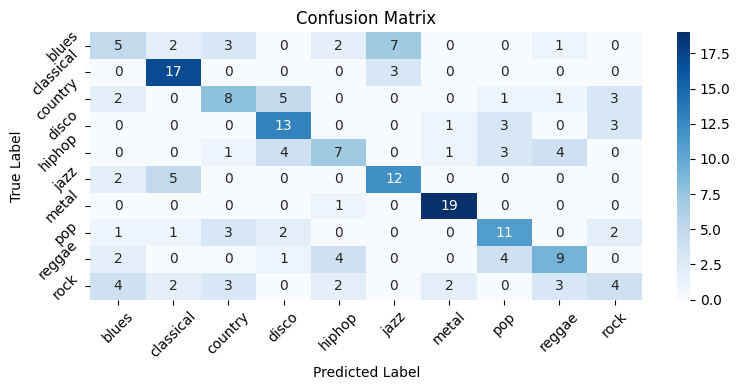

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Class labels
class_labels = list(val_generator.class_indices.keys())

# Step 3: Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 4: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


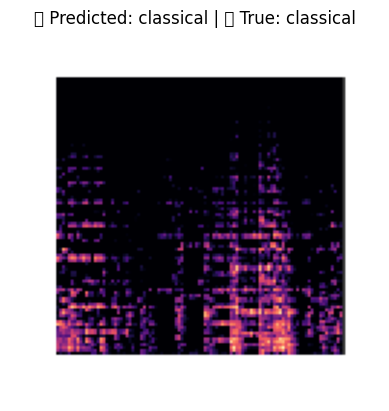

In [ ]:
# Some Random Tests from the dataset
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Fetch one batch of validation images
val_images, val_labels = next(val_generator)

# Pick a random index
random_index = random.randint(0, len(val_images) - 1)

# Select the image and its true label
random_img = val_images[random_index]
true_label_idx = np.argmax(val_labels[random_index])
class_labels = list(val_generator.class_indices.keys())
true_label = class_labels[true_label_idx]

# Predict
prediction = model.predict(np.expand_dims(random_img, axis=0))
predicted_label_idx = np.argmax(prediction)
predicted_label = class_labels[predicted_label_idx]

# Plot the image with prediction info
plt.imshow(random_img)
plt.axis('off')
plt.title(f"🎵 Predicted: {predicted_label} | ✅ True: {true_label}")
plt.show()
